In [ ]:
#Import the Libraries
import numpy as np
import pandas as pd
import os


import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
import pandas as pd
import os

# ระบุชื่อไฟล์
file_path = "average_count.xlsx"

# ตรวจสอบว่าไฟล์อยู่ในตำแหน่งเดียวกับสคริปต์หรือไม่
if os.path.exists(file_path):
    # อ่านไฟล์ Excel
    df = pd.read_excel(file_path)
    # แสดงข้อมูลใน DataFrame
    display(df)
else:
    print(f"ไม่พบไฟล์ {file_path} ในไดเรกทอรีปัจจุบัน")


,Timestamp,Average Count,Temp Sensor,Humidity Sensor,Temp_remote
0,2024-11-23 10:06:31,4.000000,26.6,65.4,25
1,2024-11-23 10:06:36,4.600000,26.6,65.4,25
2,2024-11-23 10:06:41,4.800000,26.6,65.4,25
3,2024-11-23 10:06:46,4.466667,26.6,65.4,25
4,2024-11-23 10:06:52,4.263158,26.6,65.4,25
...,...,...,...,...,...
4495,2024-11-23 16:45:04,3.440000,25.2,79.1,26
4496,2024-11-23 16:45:10,3.440000,25.2,79.1,26
4497,2024-11-23 16:45:15,3.200000,25.2,79.1,26
4498,2024-11-23 16:45:20,2.920000,25.2,79.1,26


In [ ]:
df.shape

(4500, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Timestamp        4500 non-null   object 
 1   Average Count    4500 non-null   float64
 2   Temp Sensor      4500 non-null   float64
 3   Humidity Sensor  4500 non-null   float64
 4   Temp_remote      4500 non-null   int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 175.9+ KB


In [ ]:
df.isnull().sum()

,0
Timestamp,0
Average Count,0
Temp Sensor,0
Humidity Sensor,0
Temp_remote,0


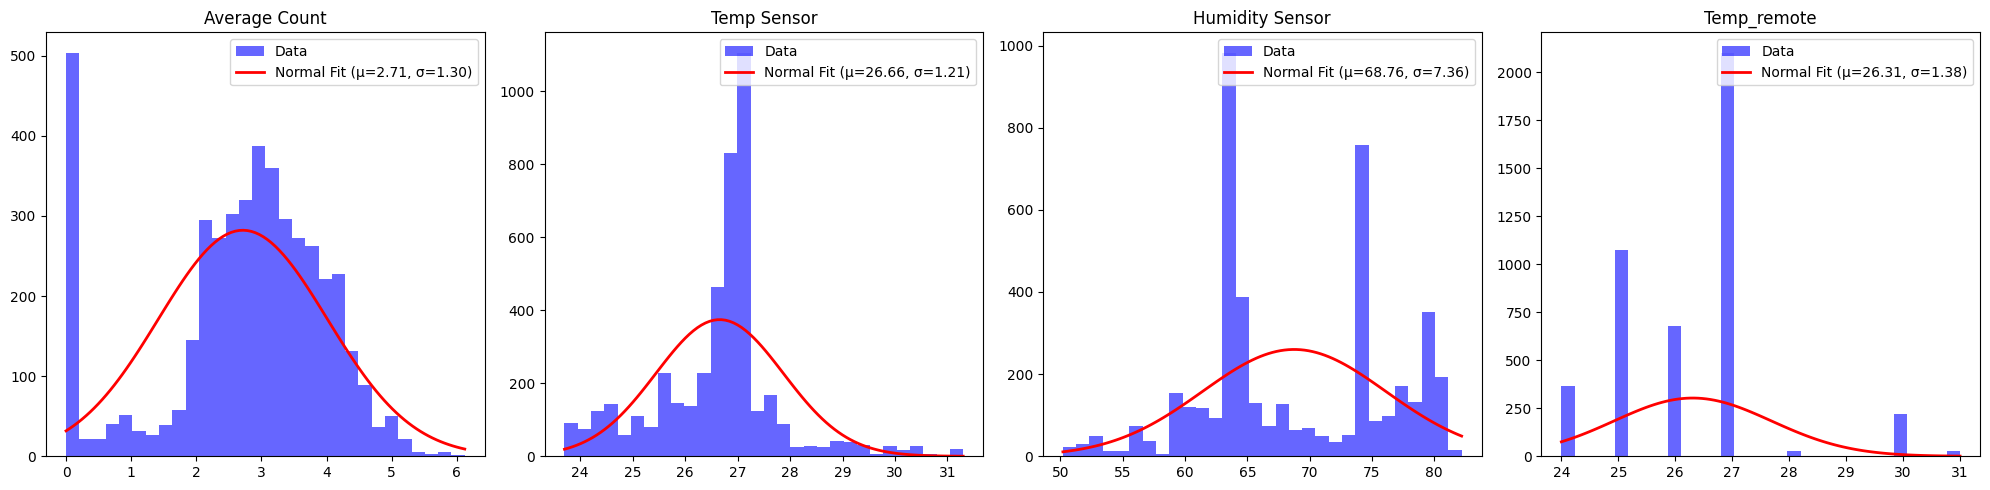

Skewness values for each column:
Average Count     -0.698580
Temp Sensor        0.113609
Humidity Sensor   -0.000517
Temp_remote        0.673362
dtype: float64


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, skew

# รายชื่อคอลัมน์ที่ต้องการ plot
columns = ['Average Count', 'Temp Sensor', 'Humidity Sensor', 'Temp_remote']

# ขนาดของกราฟ
fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(20, 5))
axes = axes.flatten()

for i, col in enumerate(columns):
    # ข้อมูลคอลัมน์ที่ต้องการ
    data = df[col].dropna()  # กรองค่าที่ไม่ใช่ NaN

    # Plot histogram
    n, bins, patches = axes[i].hist(data, bins=30, density=False, alpha=0.6, color='blue', label='Data')

    # คำนวณค่าของเส้น Normal Distribution
    mu, std = norm.fit(data)  # คำนวณค่า mean และ std
    x = np.linspace(min(bins), max(bins), 100)
    p = norm.pdf(x, mu, std) * len(data) * (bins[1] - bins[0])  # ปรับ scale เส้น Normal Distribution ให้ตรงกับ frequency

    # Plot เส้น Normal Distribution
    axes[i].plot(x, p, 'r', linewidth=2, label=f'Normal Fit (μ={mu:.2f}, σ={std:.2f})')

    # เพิ่ม title และ legend
    axes[i].set_title(col)
    axes[i].legend()

# ปรับแต่ง layout
plt.tight_layout()
plt.show()

# คำนวณค่า skewness สำหรับแต่ละคอลัมน์ที่ระบุ
skewness_values = df[columns].apply(lambda x: skew(x.dropna()), axis=0)

# แสดงค่า skewness
print("Skewness values for each column:")
print(skewness_values)


Skewness ก่อนและหลังการแปลง:
                 Before Transformation  After Transformation
Average Count                -0.698580             -0.698580
Temp Sensor                   0.113609              0.113609
Humidity Sensor              -0.000517             -0.000517
Temp_remote                   0.673362              0.673362
Columns ที่ skewness ใกล้เคียง 0 มากที่สุด:
Index(['Humidity Sensor', 'Temp Sensor', 'Temp_remote', 'Average Count'], dtype='object')


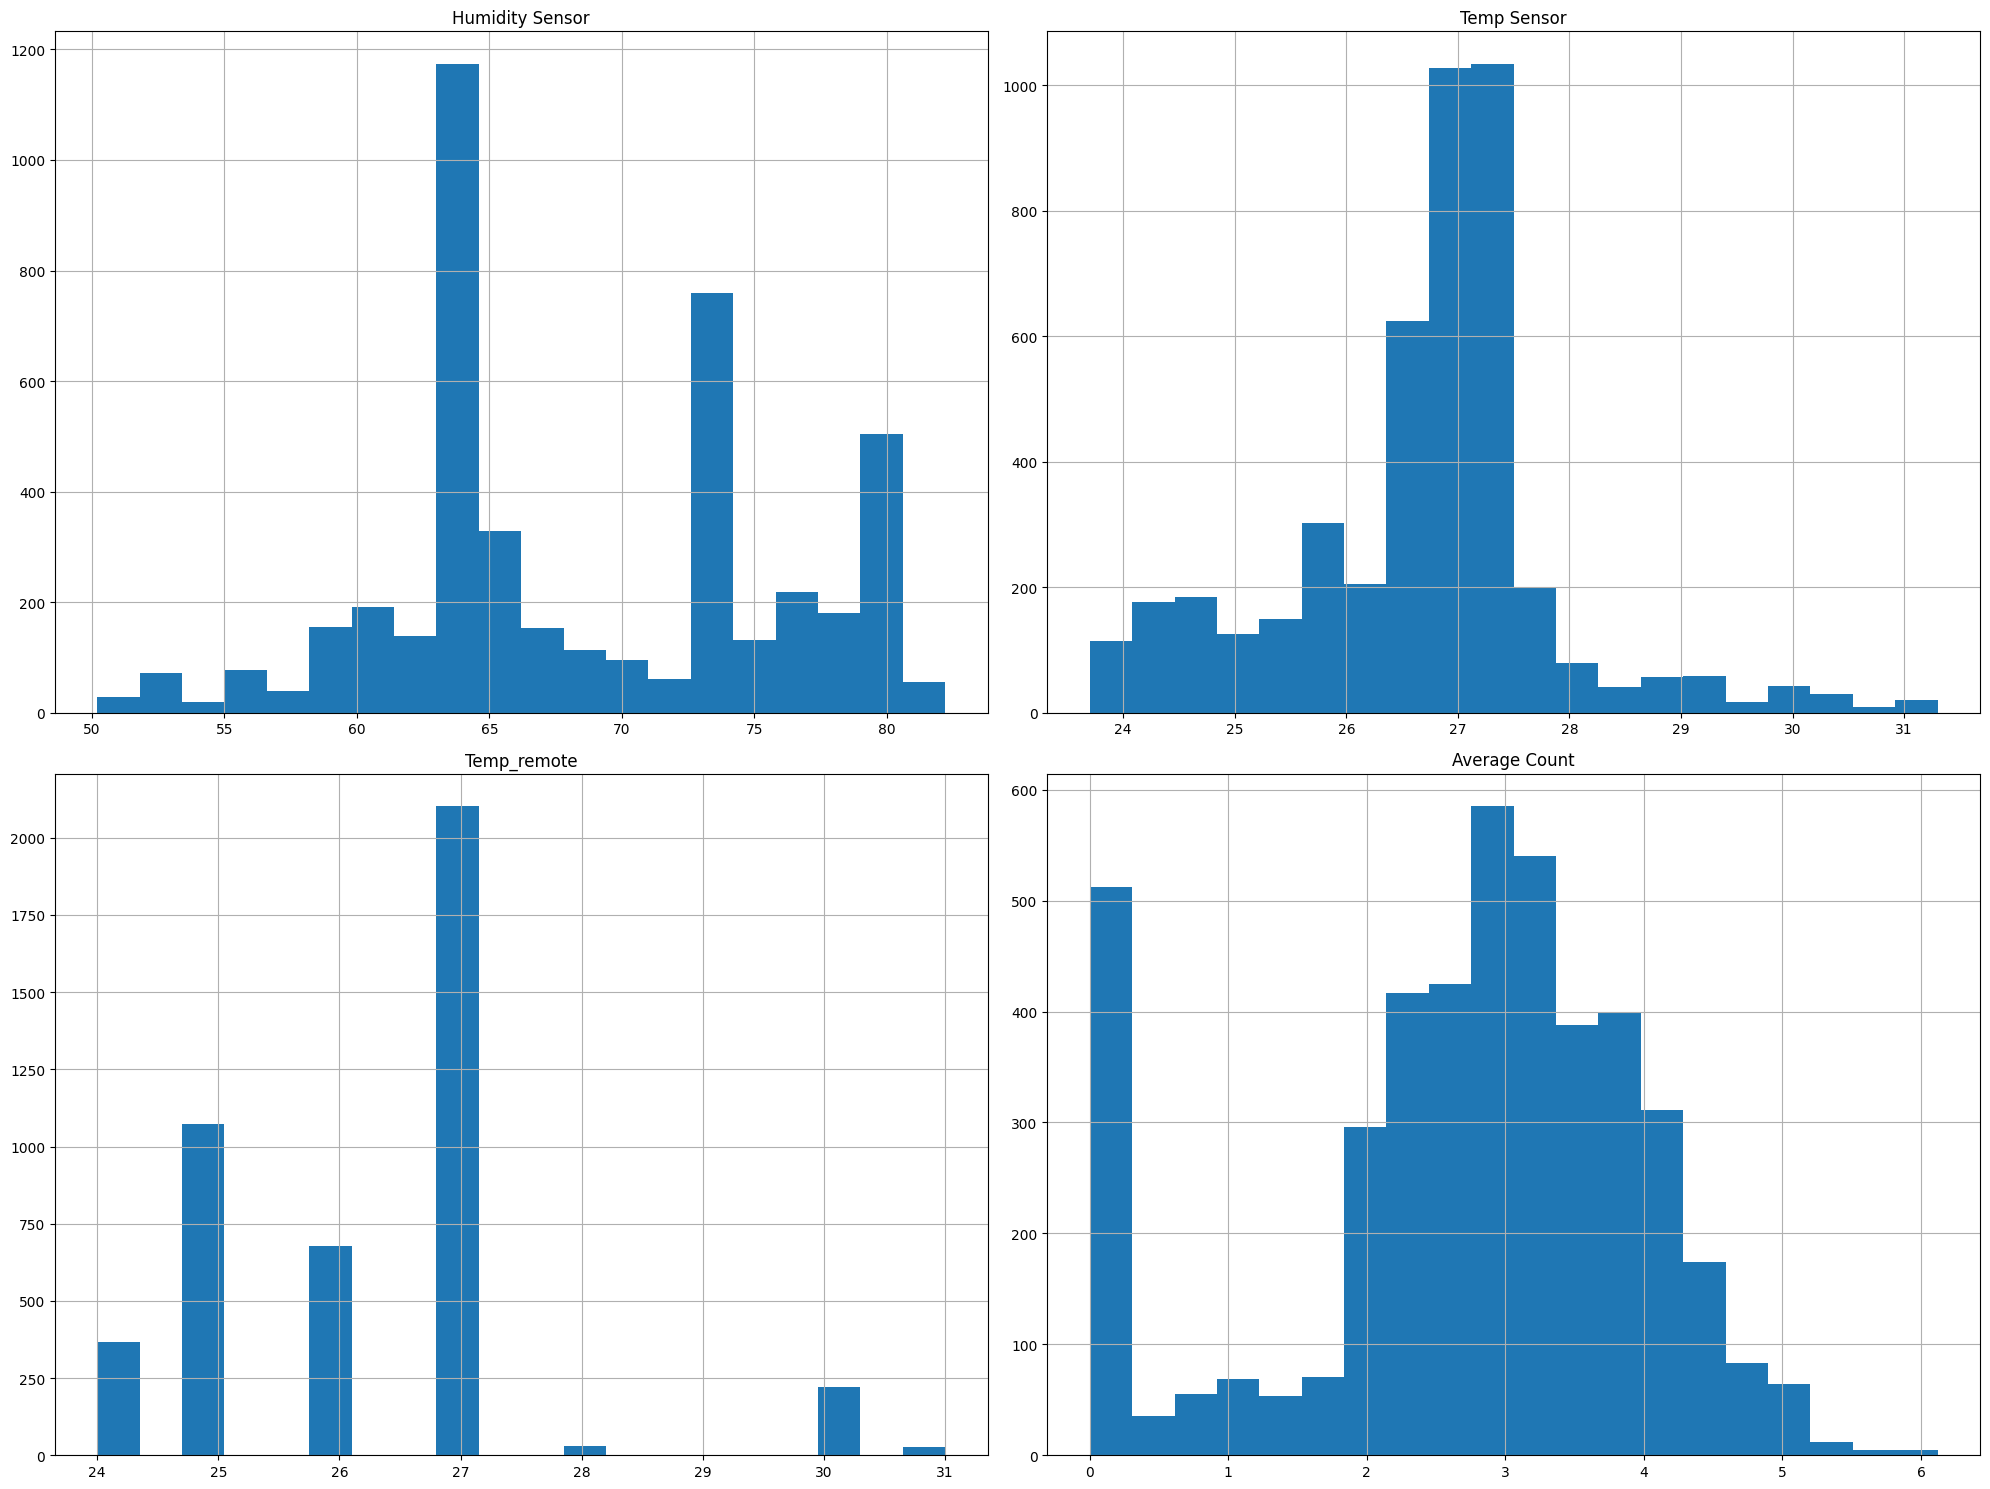

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew

# รายชื่อคอลัมน์ที่ต้องการตรวจสอบ
columns_to_transform =  ['Average Count', 'Temp Sensor', 'Humidity Sensor', 'Temp_remote']

# เติมค่า median สำหรับค่าที่เป็น NaN ก่อนคำนวณ skewness
for column in columns_to_transform:
    df[column].fillna(df[column].median(), inplace=True)

# คำนวณ skewness ก่อนการแปลง
initial_skewness = df[columns_to_transform].apply(lambda x: skew(x.dropna()), axis=0)

# แปลงข้อมูลโดยใช้ np.log1p เฉพาะ columns ที่ skewness นอกช่วง [-1, 1]
columns_to_log_transform = initial_skewness[abs(initial_skewness) > 1].index
for column in columns_to_log_transform:
    df[column] = df[column].apply(lambda x: np.log1p(x) if x >= 0 else np.nan)

# เติมค่า median อีกครั้งสำหรับค่าที่ NaN หลังการแปลง
for column in columns_to_log_transform:
    df[column].fillna(df[column].median(), inplace=True)

# คำนวณ skewness หลังการแปลง
transformed_skewness = df[columns_to_transform].apply(lambda x: skew(x.dropna()), axis=0)

# รวม skewness ก่อนและหลังการแปลง
skewness_comparison = pd.DataFrame({
    'Before Transformation': initial_skewness,
    'After Transformation': transformed_skewness
})

# แสดงค่า skewness ก่อนและหลังการแปลง
print("Skewness ก่อนและหลังการแปลง:")
print(skewness_comparison)

# ค้นหา columns ที่มีค่า skewness ใกล้ 0 มากที่สุดหลังการแปลง
best_columns = skewness_comparison['After Transformation'].abs().sort_values().index

print("Columns ที่ skewness ใกล้เคียง 0 มากที่สุด:")
print(best_columns)

# Plot histogram สำหรับ columns ที่มี skewness ใกล้เคียง 0
selected_columns = best_columns[:10]  # เลือก 10 columns ที่ดีที่สุด
df[selected_columns].hist(figsize=(20, 15), bins=20)
plt.tight_layout()
plt.show()

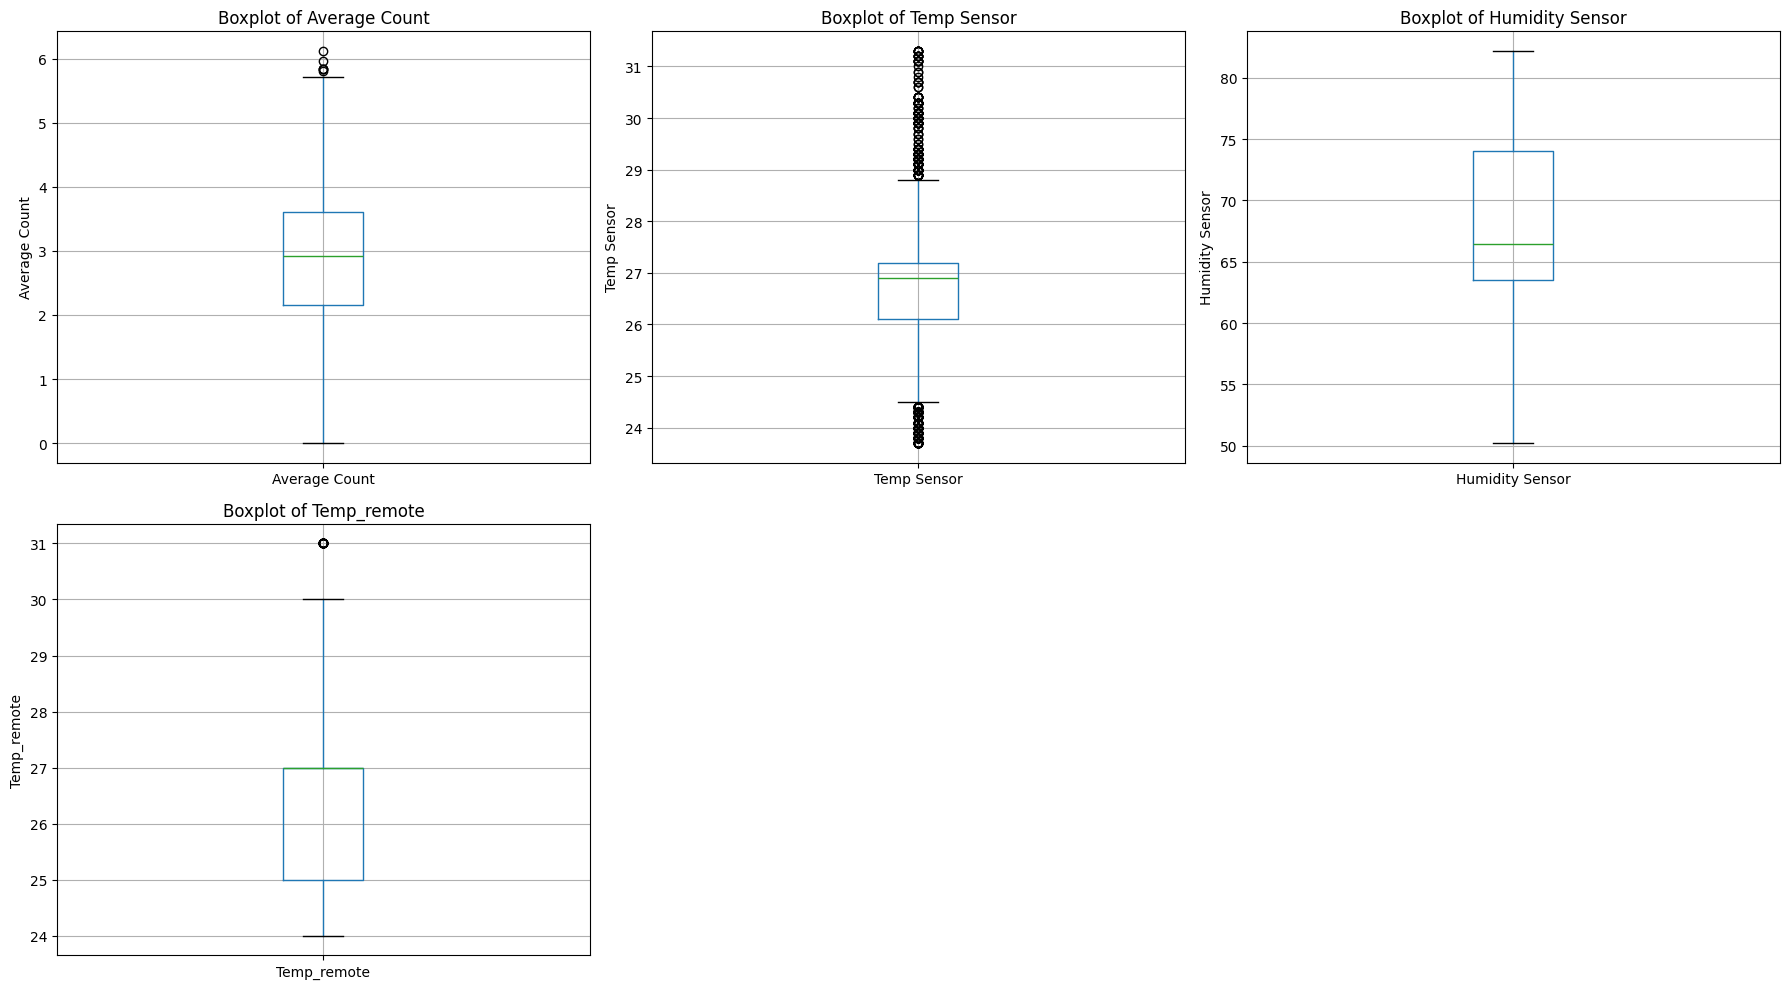

In [ ]:
import matplotlib.pyplot as plt

# คอลัมน์ที่ต้องการ plot
columns_to_plot =  ['Average Count', 'Temp Sensor', 'Humidity Sensor', 'Temp_remote']

# จำนวนแถวและคอลัมน์
ncols = 3  # จำนวนกราฟต่อแถว
nrows = (len(columns_to_plot) + ncols - 1) // ncols  # คำนวณจำนวนแถวอัตโนมัติ

# สร้าง subplot
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, nrows * 5))
axes = axes.flatten()  # แปลงเป็น array 1 มิติ

# Plot boxplot สำหรับแต่ละคอลัมน์
for i, column in enumerate(columns_to_plot):
    df.boxplot(column=column, ax=axes[i], patch_artist=False)
    axes[i].set_title(f'Boxplot of {column}', fontsize=12)
    axes[i].set_ylabel(column)

# ซ่อน subplot ที่เหลือในกรณีที่จำนวนกราฟน้อยกว่าช่อง subplot ที่สร้างขึ้น
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])  # ลบ subplot ที่ไม่ได้ใช้

# ปรับ layout
plt.tight_layout()
plt.show()


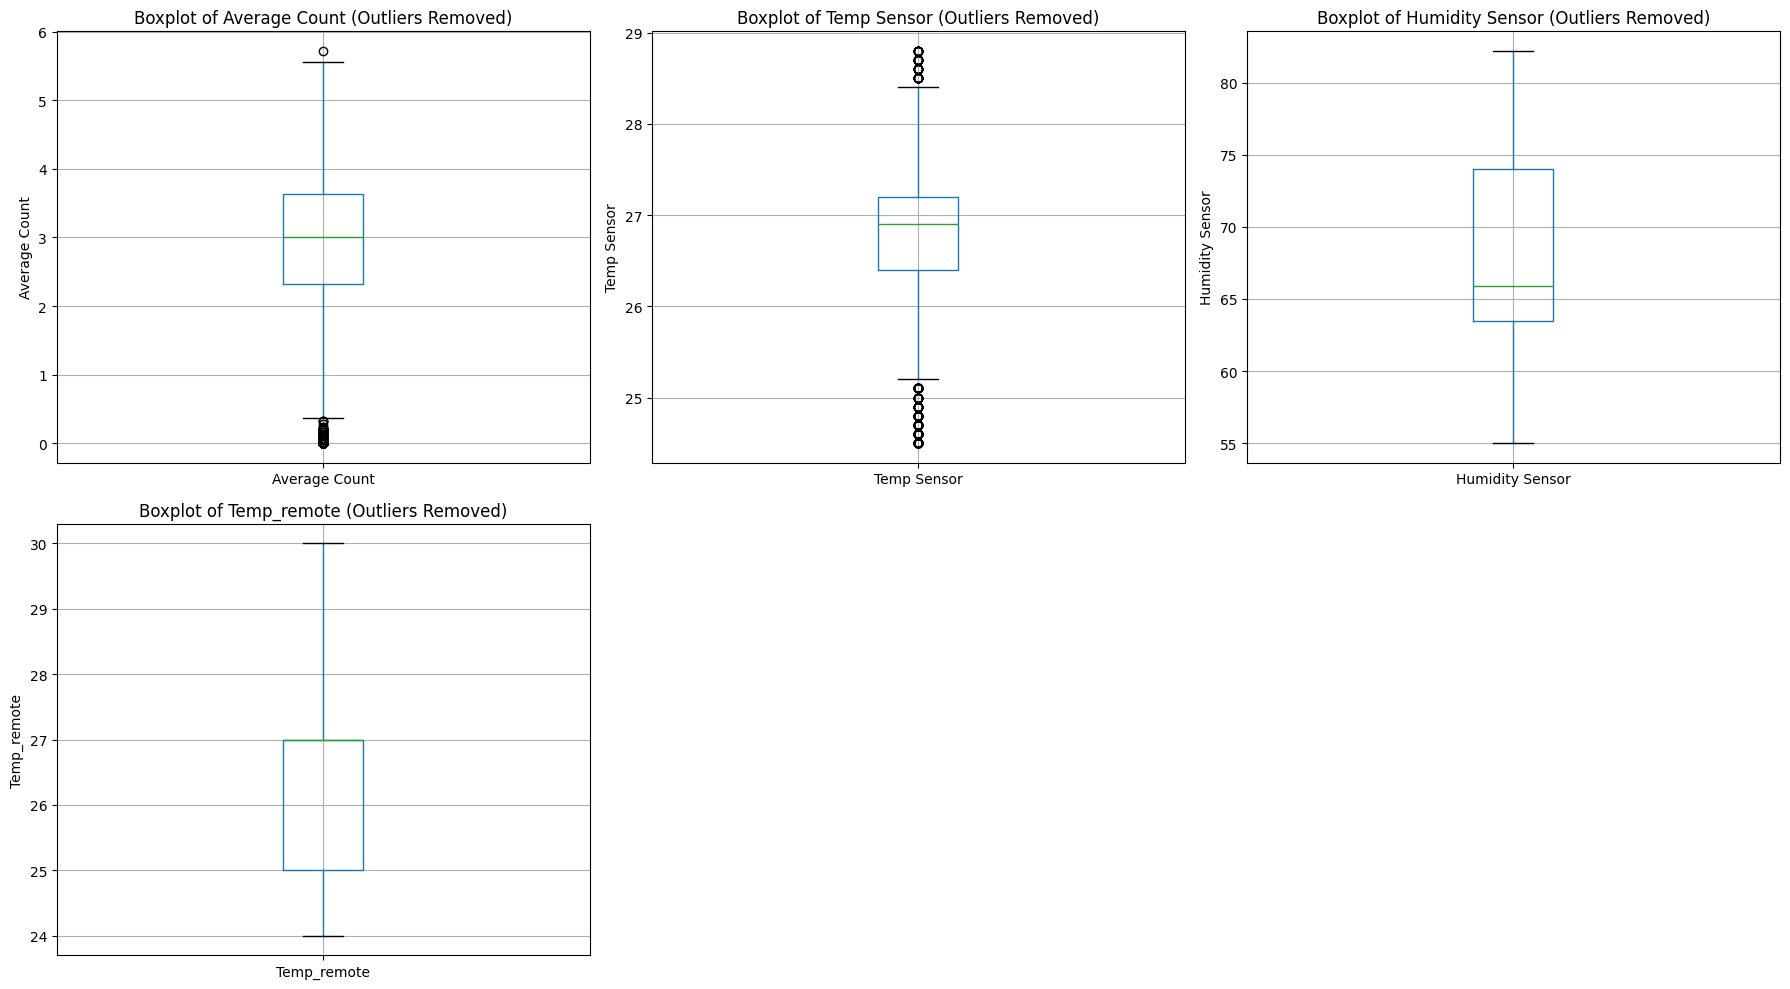

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# คอลัมน์ที่ต้องการ plot
columns_to_plot = ['Average Count', 'Temp Sensor', 'Humidity Sensor', 'Temp_remote']

# ฟังก์ชันตรวจสอบและลบ outlier โดยใช้ IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # ค่าควอไทล์แรก
    Q3 = df[column].quantile(0.75)  # ค่าควอไทล์ที่สาม
    IQR = Q3 - Q1  # ช่วงควอไทล์
    lower_bound = Q1 - 1.5 * IQR  # ขอบล่าง
    upper_bound = Q3 + 1.5 * IQR  # ขอบบน
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]  # กรองเฉพาะข้อมูลที่อยู่ในช่วง

# ลบ outliers สำหรับแต่ละคอลัมน์
for column in columns_to_plot:
    df = remove_outliers(df, column)

# จำนวนแถวและคอลัมน์สำหรับ subplot
ncols = 3  # จำนวนกราฟต่อแถว
nrows = (len(columns_to_plot) + ncols - 1) // ncols  # คำนวณจำนวนแถวอัตโนมัติ

# สร้าง subplot
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, nrows * 5))
axes = axes.flatten()  # แปลงเป็น array 1 มิติ

# Plot boxplot สำหรับแต่ละคอลัมน์
for i, column in enumerate(columns_to_plot):
    df.boxplot(column=column, ax=axes[i], patch_artist=False)
    axes[i].set_title(f'Boxplot of {column} (Outliers Removed)', fontsize=12)
    axes[i].set_ylabel(column)

# ซ่อน subplot ที่เหลือในกรณีที่จำนวนกราฟน้อยกว่าช่อง subplot ที่สร้างขึ้น
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])  # ลบ subplot ที่ไม่ได้ใช้

# ปรับ layout
plt.tight_layout()
plt.show()


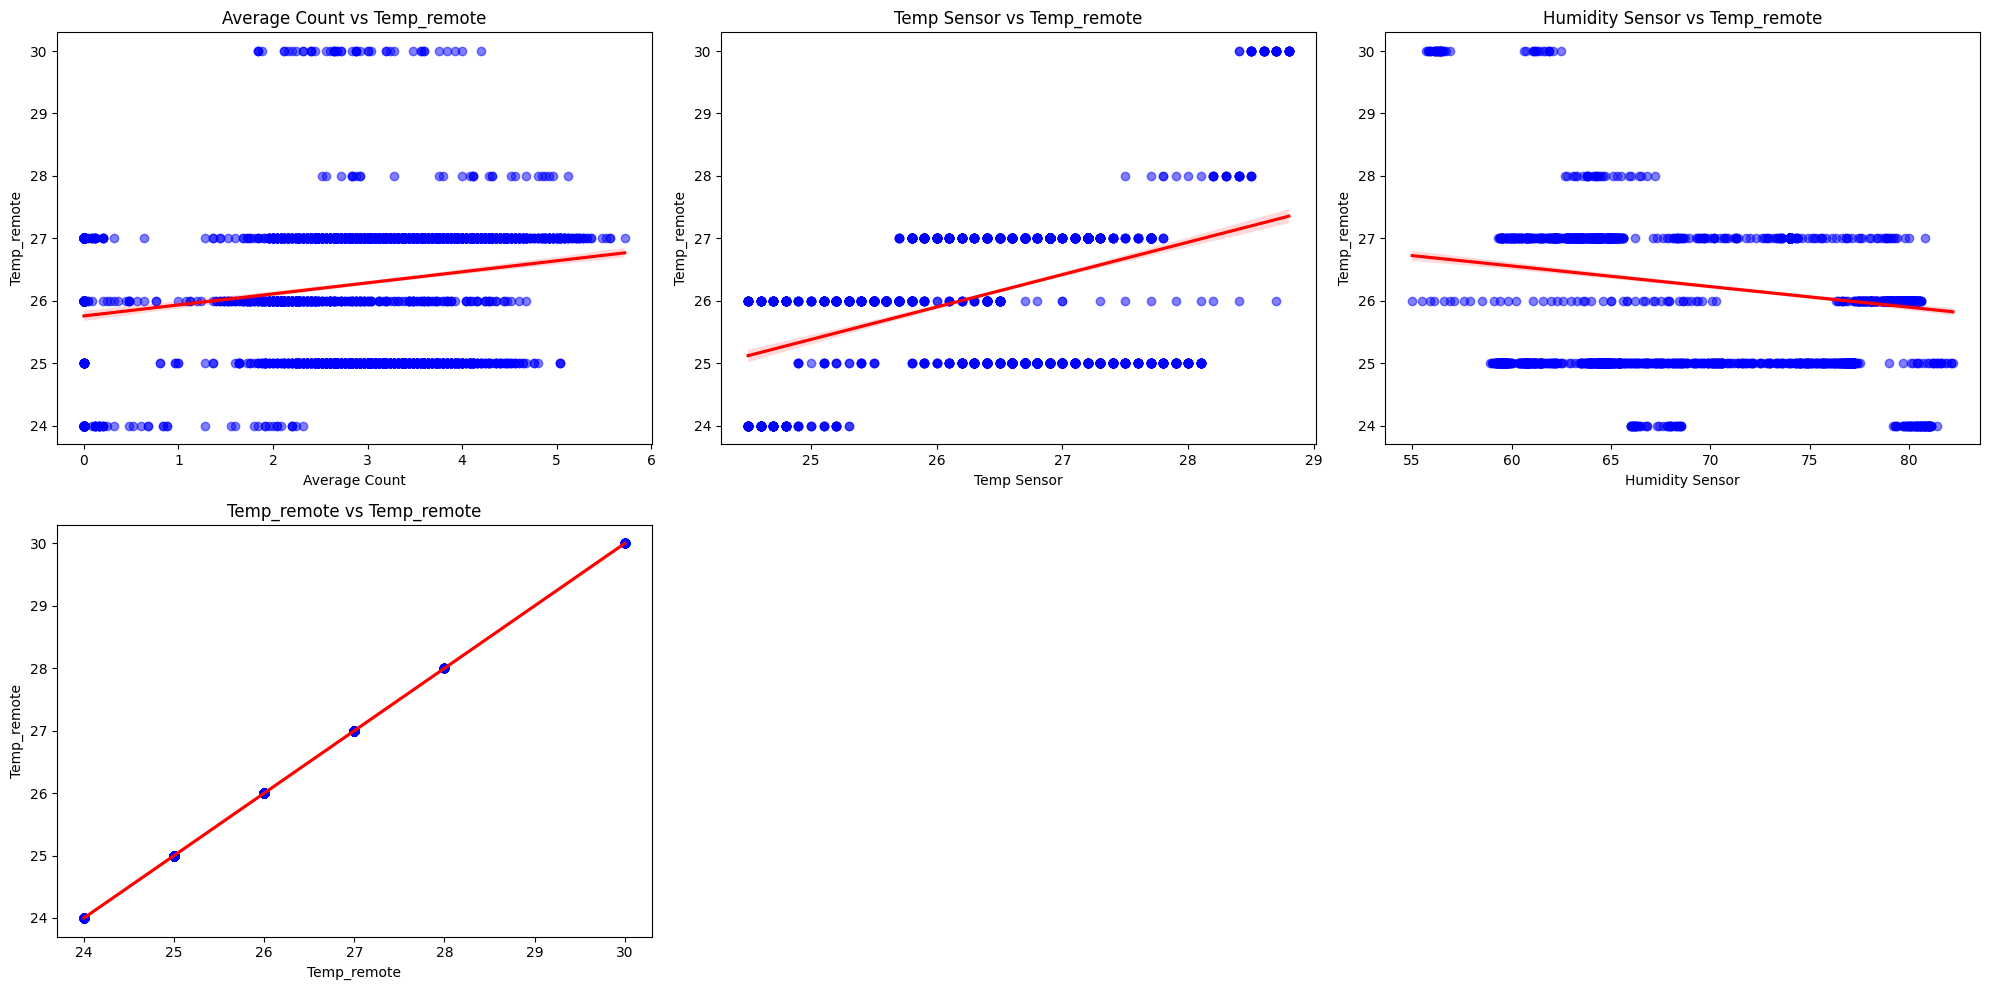

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# รายชื่อคอลัมน์ที่ต้องการ Plot
ContinuousCols = ['Average Count', 'Temp Sensor', 'Humidity Sensor', 'Temp_remote']
# จำนวนแถวและคอลัมน์
n_cols = 3  # จำนวนกราฟต่อแถว
n_rows = -(-len(ContinuousCols) // n_cols)  # คำนวณจำนวนแถวโดยปัดขึ้น

# สร้าง Subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))

# Flatten Axes เพื่อให้เข้าถึงง่าย
axes = axes.flatten()

# Loop ผ่านแต่ละ Column เพื่อสร้าง Scatter Plot พร้อมเส้นแนวโน้ม
for i, predictor in enumerate(ContinuousCols):
    ax = axes[i]
    sns.regplot(x=predictor, y='Temp_remote', data=df, scatter_kws={'alpha': 0.5, 'color': 'blue'}, line_kws={'color': 'red'}, ax=ax)
    ax.set_title(f"{predictor} vs Temp_remote")

# ลบช่องว่างใน Subplots (ถ้ามีช่องว่างที่ไม่ได้ใช้)
for i in range(len(ContinuousCols), len(axes)):
    fig.delaxes(axes[i])

# ปรับ Layout ให้ดูสวยงาม
plt.tight_layout()
plt.show()


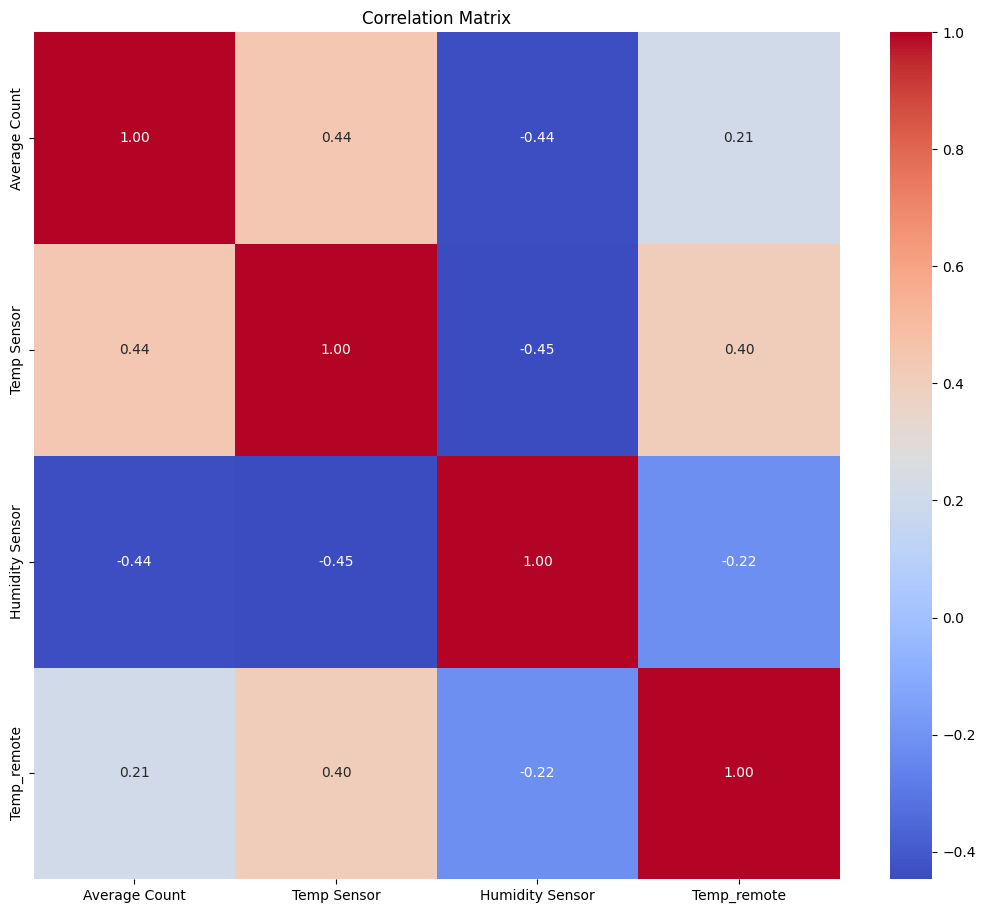

In [ ]:
# prompt: Using dataframe CorrelationMatrix: create correation matrix graph

import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df[ContinuousCols].corr()

# Create a heatmap
plt.figure(figsize=(13, 11))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df.shape

(3995, 5)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# กำหนด features และ target
features = ['Temp Sensor', 'Humidity Sensor']
target = 'Temp_remote'

# สร้าง list สำหรับเก็บผลลัพธ์
results = []

# ลูป 4 รอบสำหรับ train-test split
for i in range(1, 5):
    # แบ่งข้อมูล train-test (70:30)
    X_train, X_test, y_train, y_test = train_test_split(
        df[features], df[target], test_size=0.3, random_state=i)

    # สร้าง Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)  # ฝึกโมเดล

    # ทำนายค่าใน test set
    y_pred = model.predict(X_test)

    # คำนวณ R^2 score
    r2 = r2_score(y_test, y_pred)

    # คำนวณความถูกต้อง (accuracy)
    correct_predictions = sum(abs(y_test - y_pred) <= 1.25)  # นับจำนวนที่ค่าคาดการณ์ต่างจากค่าจริงไม่เกิน ±1
    accuracy = correct_predictions / len(y_test) * 100  # เปลี่ยนเป็นเปอร์เซ็นต์

    # เก็บ coefficients ของฟีเจอร์
    coefficients = model.coef_

    # เก็บผลลัพธ์ใน list
    results.append({
        'ชุดที่': i,
        # 'R^2 Score': r2,
        'Accuracy (%)': accuracy,
        # 'Temp Sensor Coefficient': coefficients[0],
        # 'Humidity Sensor Coefficient': coefficients[1]
    })

# แสดงผลลัพธ์ในรูปแบบ DataFrame
results_df = pd.DataFrame(results)
print(results_df)

# Plot R^2 score และ Accuracy
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 6))
# plt.plot(results_df['ชุดที่'], results_df['R^2 Score'], marker='o', label='R^2 Score')
# plt.plot(results_df['ชุดที่'], results_df['Accuracy (%)'], marker='s', label='Accuracy (%)', linestyle='--')
# plt.title('Model Performance for Each Train-Test Split')
# plt.xlabel('Split Number')
# plt.ylabel('Score')
# plt.xticks(results_df['ชุดที่'])
# plt.legend()
# plt.grid(True)
# plt.show()


   ชุดที่  Accuracy (%)
0       1     75.396163
1       2     80.150125
2       3     83.069224
3       4     76.897415
